<a href="https://colab.research.google.com/github/mikhailmuniz1/An-lise-de-dados---Telecom-X-BR/blob/main/An%C3%A1lise_de_dados_TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [37]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

# Exibe as primeiras linhas do DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [38]:
# Exibe informações sobre o DataFrame, incluindo tipos de dados e valores não nulos
display(df_flattened.info())

# Exibe os tipos de dados de cada coluna
display(df_flattened.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   int64  
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

None

,0
customerID,object
Churn,int64
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,object
InternetService,object


In [39]:
# Desaninha as colunas aninhadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatena os DataFrames desaninhados com o DataFrame original (excluindo as colunas aninhadas originais)
df_flattened = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Exibe as primeiras linhas do DataFrame desaninhado
display(df_flattened.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [40]:
# Converte 'Charges.Total' para numérico, tratando erros
df_flattened['Charges.Total'] = pd.to_numeric(df_flattened['Charges.Total'], errors='coerce')

# Exibe os tipos de dados de cada coluna novamente para confirmar a mudança
display(df_flattened.dtypes)

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


Com base no dicionário de dados fornecido e na exploração inicial do DataFrame (`df_flattened.info()`, `df_flattened.dtypes`), as seguintes colunas são consideradas mais relevantes para a análise de evasão de clientes (Churn):

*   **Churn**: Variável alvo a ser prevista.
*   **gender**, **SeniorCitizen**, **Partner**, **Dependents**: Informações demográficas que podem influenciar a evasão.
*   **tenure**: Duração do contrato do cliente em meses, um fator chave na retenção.
*   **PhoneService**, **MultipleLines**, **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies**: Detalhes dos serviços assinados, que impactam a satisfação do cliente.
*   **Contract**, **PaperlessBilling**, **PaymentMethod**: Informações sobre o contrato e pagamento que podem indicar a propensão à evasão.
*   **Charges.Monthly**, **Charges.Total**: Custos associados aos serviços, relevantes para a análise de valor e satisfação do cliente.

Essas colunas fornecem uma base sólida para entender os fatores que levam à evasão de clientes na Telecom X.

In [41]:
# Verifica se há valores ausentes
print("Valores ausentes por coluna:")
display(df_flattened.isnull().sum())

# Verifica se há linhas duplicadas
print("\nNúmero de linhas duplicadas:")
display(df_flattened.duplicated().sum())

# Verifica valores únicos em colunas do tipo 'object' para inconsistências
print("\nValores únicos em colunas 'object':")
for col in df_flattened.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    display(df_flattened[col].unique())

Valores ausentes por coluna:


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0



Número de linhas duplicadas:


np.int64(0)


Valores únicos em colunas 'object':

Coluna: customerID


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)


Coluna: Churn


array(['No', 'Yes', ''], dtype=object)


Coluna: gender


array(['Female', 'Male'], dtype=object)


Coluna: Partner


array(['Yes', 'No'], dtype=object)


Coluna: Dependents


array(['Yes', 'No'], dtype=object)


Coluna: PhoneService


array(['Yes', 'No'], dtype=object)


Coluna: MultipleLines


array(['No', 'Yes', 'No phone service'], dtype=object)


Coluna: InternetService


array(['DSL', 'Fiber optic', 'No'], dtype=object)


Coluna: OnlineSecurity


array(['No', 'Yes', 'No internet service'], dtype=object)


Coluna: OnlineBackup


array(['Yes', 'No', 'No internet service'], dtype=object)


Coluna: DeviceProtection


array(['No', 'Yes', 'No internet service'], dtype=object)


Coluna: TechSupport


array(['Yes', 'No', 'No internet service'], dtype=object)


Coluna: StreamingTV


array(['Yes', 'No', 'No internet service'], dtype=object)


Coluna: StreamingMovies


array(['No', 'Yes', 'No internet service'], dtype=object)


Coluna: Contract


array(['One year', 'Month-to-month', 'Two year'], dtype=object)


Coluna: PaperlessBilling


array(['Yes', 'No'], dtype=object)


Coluna: PaymentMethod


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [42]:
# Preencher valores ausentes na coluna 'Charges.Total' com a mediana
median_charges_total = df_flattened['Charges.Total'].median()
df_flattened['Charges.Total'].fillna(median_charges_total, inplace=True)

# Remover linhas onde a coluna 'Churn' é uma string vazia
df_flattened = df_flattened[df_flattened['Churn'] != ''].copy()

# Verificar novamente se há valores ausentes e inconsistências em 'Churn'
print("Valores ausentes após tratamento:")
display(df_flattened.isnull().sum())

print("\nValores únicos em 'Churn' após tratamento:")
display(df_flattened['Churn'].unique())

Valores ausentes após tratamento:


/tmp/ipython-input-2949082698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flattened['Charges.Total'].fillna(median_charges_total, inplace=True)


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0



Valores únicos em 'Churn' após tratamento:


array(['No', 'Yes'], dtype=object)

In [43]:
# Cria a coluna 'Contas_Diarias' dividindo 'Charges.Monthly' por 30
df_flattened['Contas_Diarias'] = df_flattened['Charges.Monthly'] / 30

# Exibe as primeiras linhas com a nova coluna
display(df_flattened.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [44]:
# Converter colunas binárias (Yes/No) para 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_flattened[col] = df_flattened[col].map({'Yes': 1, 'No': 0})

# Converter coluna gender para 1/0 (Male/Female)
df_flattened['gender'] = df_flattened['gender'].map({'Male': 1, 'Female': 0})

# Exibir os tipos de dados novamente para mostrar as mudanças
print("Tipos de dados após codificação binária:")
display(df_flattened.dtypes)

# Exibir as primeiras linhas para mostrar os valores transformados
display(df_flattened.head())

Tipos de dados após codificação binária:


,0
customerID,object
Churn,int64
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,object
InternetService,object


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [45]:

# Identifica as colunas categóricas a serem codificadas (excluindo binárias e customerID)
categorical_cols = df_flattened.select_dtypes(include='object').columns.tolist()

# Exclui 'customerID', pois é um identificador
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')


# Aplica one-hot encoding
df_encoded = pd.get_dummies(df_flattened, columns=categorical_cols, drop_first=True)


# Exibe as primeiras linhas do dataframe codificado
display(df_encoded.head())


# Exibe a forma e as colunas do novo dataframe
print("\nShape of the encoded DataFrame:")
display(df_encoded.shape)

print("\nColumns of the encoded DataFrame:")
display(df_encoded.columns)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,0,0,1,1,9,1,1,65.6,...,True,False,True,False,False,True,False,False,False,True
1,0003-MKNFE,0,1,0,0,0,9,1,0,59.9,...,False,False,False,False,True,False,False,False,False,True
2,0004-TLHLJ,1,1,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,1,0,13,1,1,98.0,...,False,False,True,False,True,False,False,False,True,False
4,0013-EXCHZ,1,0,1,1,0,3,1,1,83.9,...,True,False,True,False,False,False,False,False,False,True



Shape of the encoded DataFrame:


(7043, 33)


Columns of the encoded DataFrame:


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling',
       'Charges.Monthly', 'Charges.Total', 'Contas_Diarias',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#📊 Carga e análise

In [46]:
# Realiza a análise descritiva do DataFrame codificado
display(df_encoded.describe())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.906815,2.158723
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.274362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,1.183333
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


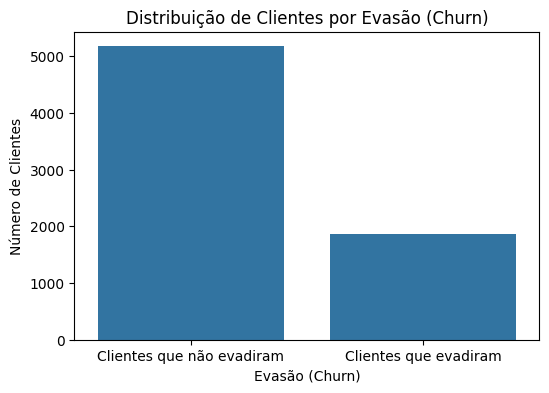

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the 'Churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_flattened)
plt.title('Distribuição de Clientes por Evasão (Churn)')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Clientes que não evadiram', 'Clientes que evadiram']) # Set custom labels
plt.show()

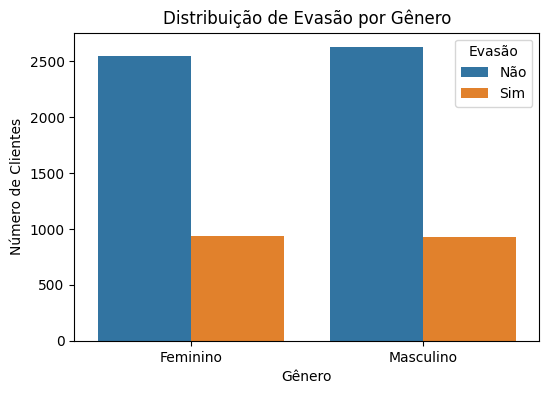

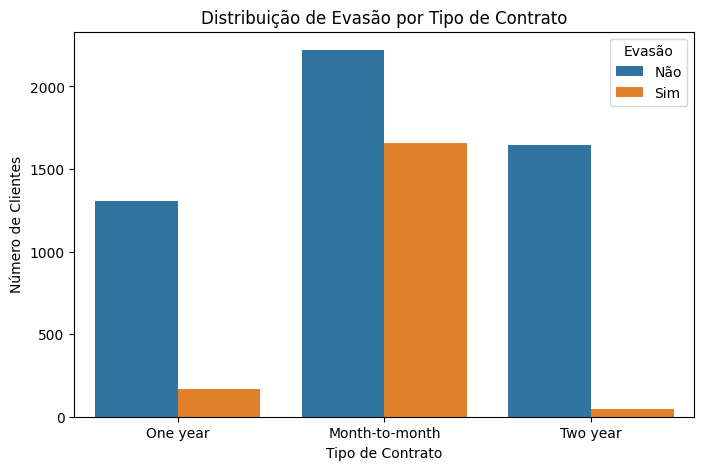

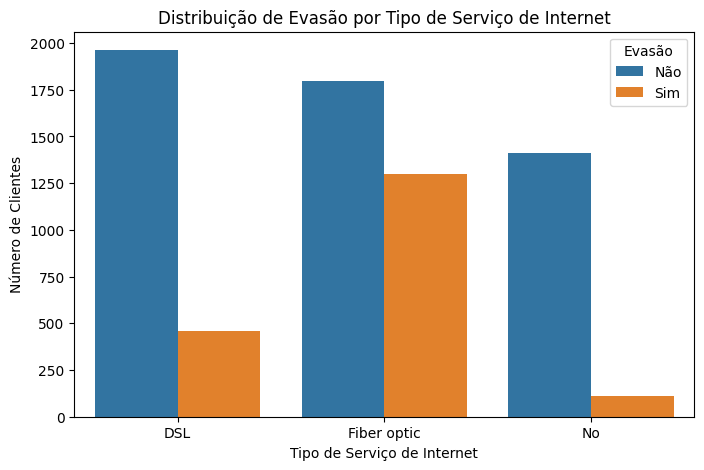

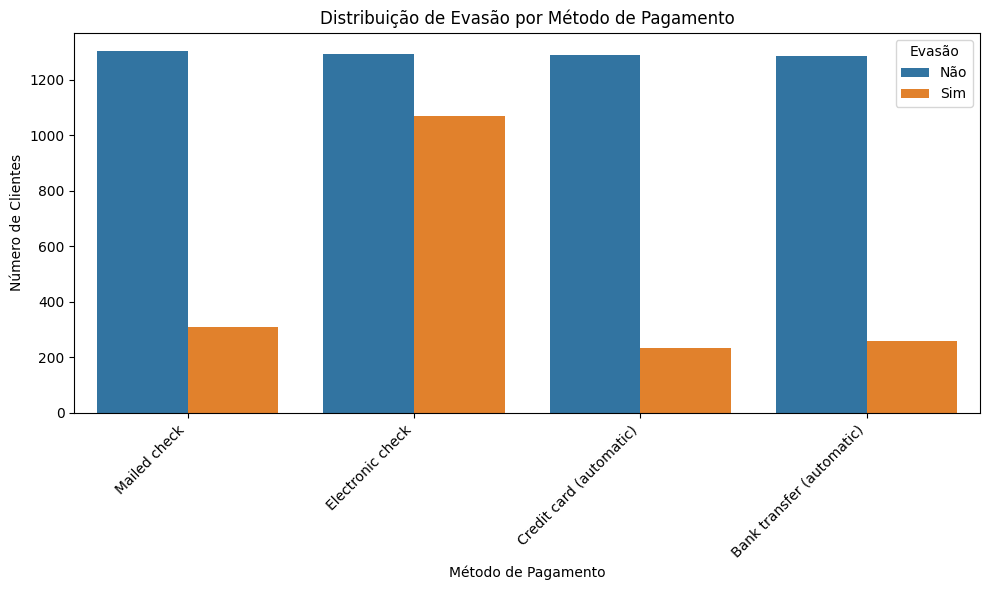

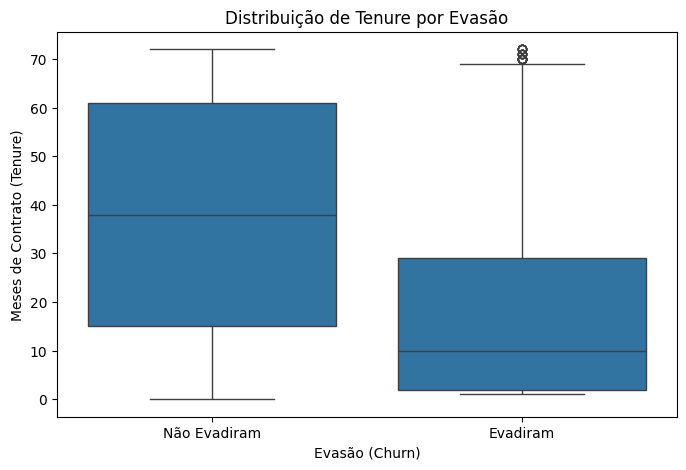

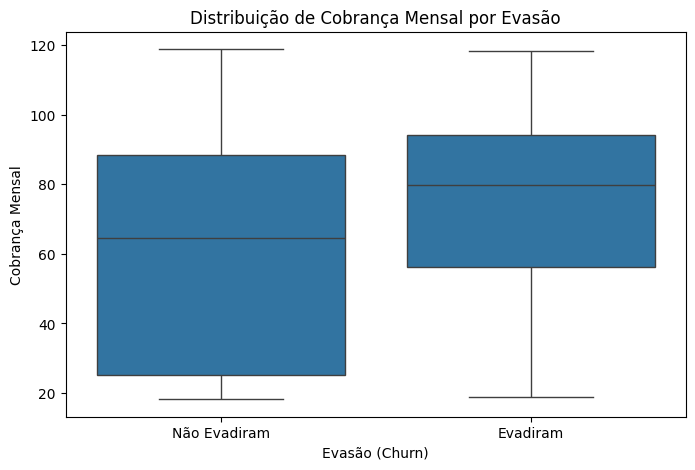

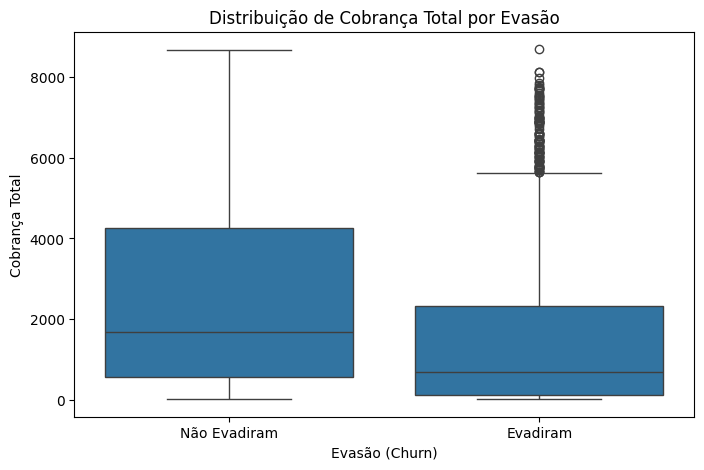

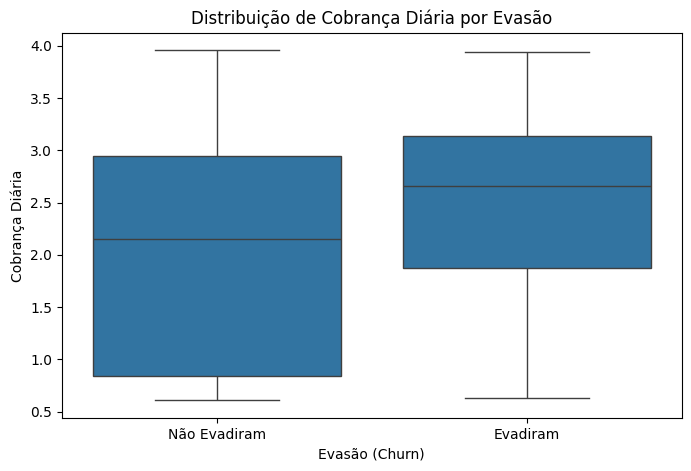

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explorar a distribuição de Churn por gênero (countplot)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df_flattened)
plt.title('Distribuição de Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()

# Explorar a distribuição de Churn por tipo de contrato (countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df_flattened)
plt.title('Distribuição de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()

# Explorar a distribuição de Churn por tipo de serviço de internet (countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df_flattened)
plt.title('Distribuição de Evasão por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()

# Explorar a distribuição de Churn por método de pagamento (countplot)
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_flattened)
plt.title('Distribuição de Evasão por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

# Explorar a distribuição de Churn por Tenure (meses de contrato) (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df_flattened)
plt.title('Distribuição de Tenure por Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Meses de Contrato (Tenure)')
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()

# Explorar a distribuição de Churn por Charges.Monthly (cobrança mensal) (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_flattened)
plt.title('Distribuição de Cobrança Mensal por Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Cobrança Mensal')
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()

# Explorar a distribuição de Churn por Charges.Total (cobrança total) (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df_flattened)
plt.title('Distribuição de Cobrança Total por Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Cobrança Total')
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()

# Explorar a distribuição de Churn por Contas_Diarias (cobrança diária) (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Contas_Diarias', data=df_flattened)
plt.title('Distribuição de Cobrança Diária por Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Cobrança Diária')
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()

#📄Relatorio Final

# Relatório Final da Análise de Evasão de Clientes (Churn)

## Introdução

Este projeto teve como objetivo analisar o problema de evasão de clientes (Churn) na Telecom X. A evasão de clientes é um desafio significativo para empresas de telecomunicações, pois impacta diretamente a receita e o crescimento. Compreender os fatores que levam os clientes a cancelar seus serviços é fundamental para desenvolver estratégias eficazes de retenção.

## Limpeza e Tratamento de Dados

A análise começou com a importação dos dados de uma API no formato JSON. O dataset continha informações aninhadas, que foram **desaninhadas** e combinadas em um único DataFrame (`df_flattened`) para facilitar a manipulação.

Durante a fase de limpeza e tratamento, foram identificadas e corrigidas inconsistências:

*   **Valores Ausentes:** Foram encontrados 11 valores ausentes na coluna `Charges.Total`, que foram preenchidos com a mediana da coluna.
*   **Inconsistências na Coluna Churn:** A coluna alvo `Churn` continha strings vazias (`''`). As linhas com esses valores foram removidas para garantir a integridade da variável alvo.
*   **Criação de Nova Feature:** Foi criada a coluna `Contas_Diarias` dividindo `Charges.Monthly` por 30 para obter uma estimativa do custo diário para o cliente.
*   **Codificação de Variáveis Categóricas:** Variáveis categóricas binárias ('Yes'/'No', 'Male'/'Female') foram convertidas para valores numéricos (1/0). As demais variáveis categóricas com múltiplas categorias foram tratadas utilizando One-Hot Encoding para prepará-las para a modelagem.

## Análise Exploratória de Dados (EDA)

A EDA foi realizada para entender a distribuição dos dados e a relação entre as variáveis e a evasão. Algumas das análises e visualizações incluíram:

*   **Distribuição da Variável Churn:** Um gráfico de barras (countplot) mostrou a proporção de clientes que evadiram e que não evadiram, revelando um desbalanceamento na variável alvo.
*   **Relação de Variáveis Categóricas com Churn:** Gráficos de barras (countplots) foram utilizados para visualizar a distribuição de evasão entre diferentes categorias de variáveis como `gender`, `Contract`, `InternetService` e `PaymentMethod`. Essas visualizações indicaram diferenças nas taxas de evasão entre grupos (por exemplo, clientes com contrato mensal e clientes com serviço de internet de fibra óptica parecem ter maior taxa de evasão).
*   **Relação de Variáveis Numéricas com Churn:** Box plots foram utilizados para explorar a distribuição de variáveis numéricas como `tenure`, `Charges.Monthly`, `Charges.Total` e `Contas_Diarias` em relação à evasão. Essas visualizações sugeriram que clientes que evadiram tendem a ter menor `tenure` (tempo de contrato) e maiores `Charges.Monthly` e `Charges.Total`.

## Conclusões e Insights

Com base na análise realizada, alguns insights importantes sobre a evasão de clientes na Telecom X incluem:

*   A base de clientes é majoritariamente composta por clientes que não evadem, mas a taxa de evasão ainda é significativa.
*   Clientes com contratos de **mês a mês** e aqueles que utilizam **serviço de internet de fibra óptica** parecem ter uma propensão maior à evasão.
*   Clientes com **menor tempo de contrato (tenure)** tendem a evadir mais.
*   Clientes com **cobranças mensais e totais mais altas** também parecem ter uma maior taxa de evasão.
*   A forma de pagamento também parece influenciar a evasão, com **pagamentos eletrônicos** mostrando uma taxa de evasão relativamente alta.

## Recomendações

Com base nos insights da análise exploratória, algumas recomendações para a Telecom X reduzir a evasão de clientes incluem:

*   **Focar na retenção de clientes com contratos de mês a mês:** Oferecer incentivos para que esses clientes migrem para contratos de maior duração.
*   **Investigar a satisfação dos clientes com serviço de fibra óptica:** Identificar e resolver possíveis problemas relacionados a este serviço que possam estar levando à evasão.
*   **Implementar programas de fidelidade para clientes com menor tempo de contrato:** Incentivar a permanência de novos clientes.
*   **Analisar a relação entre cobranças elevadas e evasão:** Rever as estruturas de preços ou oferecer pacotes mais competitivos, especialmente para clientes com altos gastos mensais.
*   **Avaliar a experiência do cliente com pagamentos eletrônicos:** Garantir que o processo seja simples e seguro para reduzir a evasão relacionada a este método.

Este relatório resume as principais descobertas e sugere caminhos para a Telecom X abordar o desafio da evasão de clientes de forma proativa. As análises realizadas fornecem uma base sólida para futuras modelagens preditivas de Churn.